In [ ]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt
datasets=load_dataset('lukebarousse/data_jobs')
df=datasets['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list:ast.literal_eval(skill_list)
                                        if pd.notna(skill_list) else skill_list
                                        )



In [39]:
import seaborn as sns

In [61]:
job_titles=['Data Analyst','Data Scientist','Data Engineer']

df_us=df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()

In [40]:
df_da_us=df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='United States')].copy()
df_da_us=df_da_us.dropna(subset=['salary_year_avg'])

In [41]:
df_da_us=df_da_us.explode('job_skills')
df_da_us
df_da_top_pay=df_da_us.groupby('job_skills')['salary_year_avg'].agg([
    'count','median']
).sort_values(by='median',ascending=False)
df_da_top_pay=df_da_top_pay.head(10)

In [42]:
df_da_skills=df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_da_skills=df_da_skills.head(10).sort_values(by='median',ascending=False)

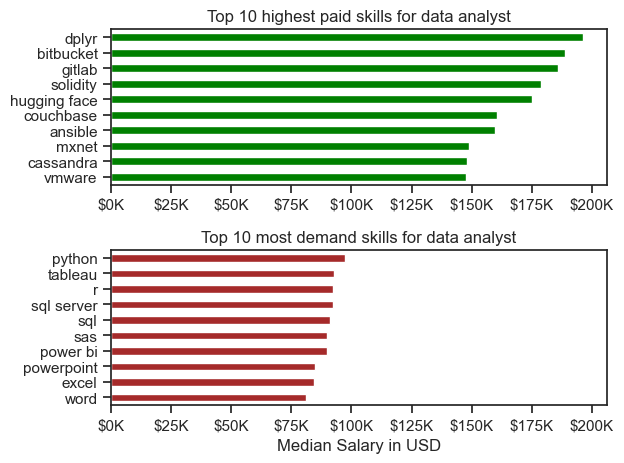

In [43]:
fig,ax=plt.subplots(2,1)
df_da_top_pay.plot(kind='barh',y='median',ax=ax[0],color='green',legend=False)
ax[0].set_title('Top 10 highest paid skills for data analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].invert_yaxis()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))
df_da_skills[::-1].plot(kind='barh',y='median',ax=ax[1],color='brown',legend=False)
#slicer used to reverse. to show that we can use it in two ways
ax[1].set_title('Top 10 most demand skills for data analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary in USD')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))
fig.tight_layout()

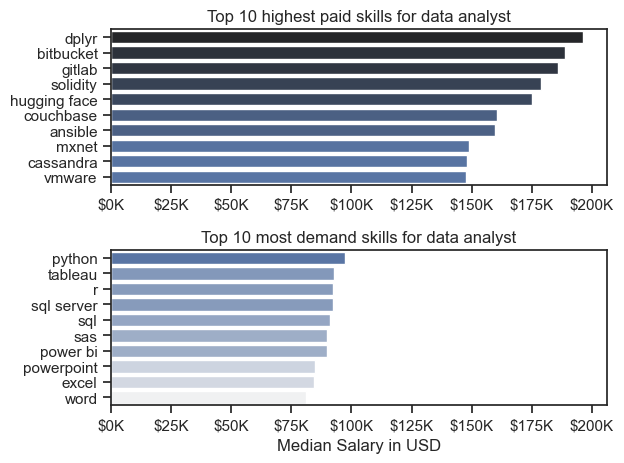

In [44]:

fig,ax=plt.subplots(2,1)
sns.set_theme(style='ticks')
#df_da_top_pay.plot(kind='barh',y='median',ax=ax[0],color='green',legend=False)
sns.barplot(data=df_da_top_pay,x='median',y=df_da_top_pay.index,ax=ax[0],
            hue='median',palette='dark:b_r') #dark blue, _r reverse the palette

ax[0].set_title('Top 10 highest paid skills for data analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend().remove()
#ax[0].invert_yaxis()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))
##
#df_da_skills[::-1].plot(kind='barh',y='median',ax=ax[1],color='brown',legend=False)
#slicer used to reverse. to show that we can use it in two ways
sns.barplot(data=df_da_skills,x='median',y=df_da_skills.index,ax=ax[1],
            hue='median',palette='light:b')
ax[1].set_title('Top 10 most demand skills for data analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary in USD')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].legend().remove()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))
fig.tight_layout()

Text(0, 0.5, 'No of Jobs')

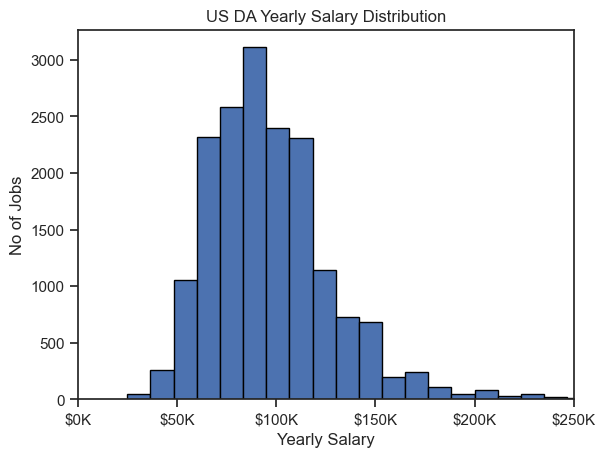

In [54]:
df_da_us['salary_year_avg'].plot(kind='hist',bins=30,edgecolor='black')
plt.xlim(0,250000)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))
plt.title('US DA Yearly Salary Distribution')
plt.xlabel('Yearly Salary')
plt.ylabel('No of Jobs')

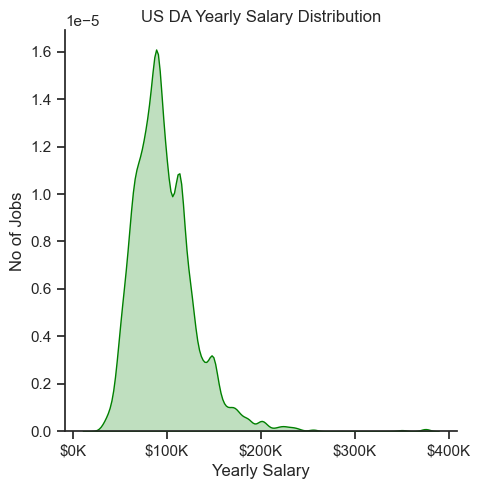

In [55]:
##df_da_us['salary_year_avg'].plot(kind='hist',bins=30,edgecolor='black')
##plt.xlim(0,250000)
sns.displot(df_da_us['salary_year_avg'],kind='kde',fill=True,color='green')
plt.title('US DA Yearly Salary Distribution')
plt.xlabel('Yearly Salary')
plt.ylabel('No of Jobs')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))
plt.show()

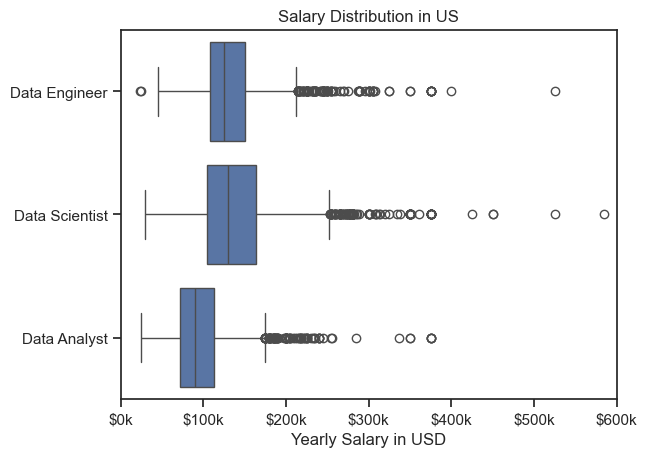

In [63]:
sns.boxplot(data=df_us,x='salary_year_avg',y='job_title_short')
plt.title('Salary Distribution in US')
plt.xlabel('Yearly Salary in USD')
plt.xlim(0,600000)
plt.ylabel('')
ticks_x=plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}k')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [ ]:
#https://www.youtube.com/watch?v=wUSDVGivd-8
#9h45m